# 从生物到人工神经元

In [1]:
#from tensorflow.examples.tutorials.mnist import input_data
#import numpy as np

In [2]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
per_clf.coef_

array([[-1.1, -1.2]])

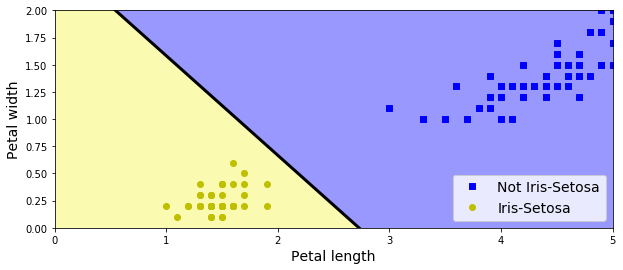

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]
x0,x1 = np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Not Iris-Setosa")
plt.plot(X[:,0][y==1], X[:,1][y==1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()


In [6]:
import tensorflow as tf

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [8]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_task_type': 'worker', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_is_chief': True, '_session_config': None, '_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpbkksia_d', '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020C6903B518>, '_num_worker_replicas': 1, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_master': '', '_service': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_device_fn': None, '_save_checkpoints_secs': 600}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

INFO:tensorflow:global_step/sec: 433.957
INFO:tensorflow:loss = 0.5329408, step = 7200 (0.230 sec)
INFO:tensorflow:global_step/sec: 436.798
INFO:tensorflow:loss = 4.092913, step = 7300 (0.229 sec)
INFO:tensorflow:global_step/sec: 425.206
INFO:tensorflow:loss = 0.42464277, step = 7400 (0.241 sec)
INFO:tensorflow:global_step/sec: 435.793
INFO:tensorflow:loss = 0.3940115, step = 7500 (0.230 sec)
INFO:tensorflow:global_step/sec: 424.68
INFO:tensorflow:loss = 5.8451595, step = 7600 (0.229 sec)
INFO:tensorflow:global_step/sec: 383.237
INFO:tensorflow:loss = 0.041169986, step = 7700 (0.261 sec)
INFO:tensorflow:global_step/sec: 395.323
INFO:tensorflow:loss = 0.69158083, step = 7800 (0.253 sec)
INFO:tensorflow:global_step/sec: 383.369
INFO:tensorflow:loss = 0.3009379, step = 7900 (0.261 sec)
INFO:tensorflow:global_step/sec: 423.716
INFO:tensorflow:loss = 0.09894502, step = 8000 (0.236 sec)
INFO:tensorflow:global_step/sec: 435.22
INFO:tensorflow:loss = 0.3610235, step = 8100 (0.234 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 436.524
INFO:tensorflow:loss = 0.018331217, step = 15400 (0.229 sec)
INFO:tensorflow:global_step/sec: 421.902
INFO:tensorflow:loss = 0.20331831, step = 15500 (0.237 sec)
INFO:tensorflow:global_step/sec: 434.538
INFO:tensorflow:loss = 0.07180709, step = 15600 (0.230 sec)
INFO:tensorflow:global_step/sec: 426.8
INFO:tensorflow:loss = 0.12097899, step = 15700 (0.234 sec)
INFO:tensorflow:global_step/sec: 436.042
INFO:tensorflow:loss = 0.049670994, step = 15800 (0.229 sec)
INFO:tensorflow:global_step/sec: 434.506
INFO:tensorflow:loss = 0.024969708, step = 15900 (0.230 sec)
INFO:tensorflow:global_step/sec: 425.317
INFO:tensorflow:loss = 0.014664184, step = 16000 (0.235 sec)
INFO:tensorflow:global_step/sec: 432.61
INFO:tensorflow:loss = 0.30886978, step = 16100 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.776
INFO:tensorflow:loss = 0.05798445, step = 16200 (0.234 sec)
INFO:tensorflow:global_step/sec: 431.69
INFO:tensorflow:loss = 0.1505799, step = 16300 (0.

INFO:tensorflow:global_step/sec: 432.771
INFO:tensorflow:loss = 0.098137476, step = 23500 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.852
INFO:tensorflow:loss = 0.0043120747, step = 23600 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.674
INFO:tensorflow:loss = 0.016398367, step = 23700 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.451
INFO:tensorflow:loss = 0.015112505, step = 23800 (0.230 sec)
INFO:tensorflow:global_step/sec: 435.203
INFO:tensorflow:loss = 0.13905793, step = 23900 (0.230 sec)
INFO:tensorflow:global_step/sec: 424.854
INFO:tensorflow:loss = 0.07692372, step = 24000 (0.235 sec)
INFO:tensorflow:global_step/sec: 444.672
INFO:tensorflow:loss = 0.019321224, step = 24100 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.926
INFO:tensorflow:loss = 0.0009483857, step = 24200 (0.230 sec)
INFO:tensorflow:global_step/sec: 424.205
INFO:tensorflow:loss = 0.059598297, step = 24300 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.541
INFO:tensorflow:loss = 0.017900156, step 

INFO:tensorflow:global_step/sec: 434.051
INFO:tensorflow:loss = 0.019158788, step = 31600 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.897
INFO:tensorflow:loss = 0.028087586, step = 31700 (0.230 sec)
INFO:tensorflow:global_step/sec: 436.444
INFO:tensorflow:loss = 0.016256735, step = 31800 (0.236 sec)
INFO:tensorflow:global_step/sec: 415.531
INFO:tensorflow:loss = 0.024652906, step = 31900 (0.234 sec)
INFO:tensorflow:global_step/sec: 423.423
INFO:tensorflow:loss = 0.014945474, step = 32000 (0.236 sec)
INFO:tensorflow:global_step/sec: 434.84
INFO:tensorflow:loss = 0.04917923, step = 32100 (0.234 sec)
INFO:tensorflow:global_step/sec: 427.052
INFO:tensorflow:loss = 0.009212926, step = 32200 (0.230 sec)
INFO:tensorflow:global_step/sec: 435.671
INFO:tensorflow:loss = 0.011423176, step = 32300 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.222
INFO:tensorflow:loss = 0.009095768, step = 32400 (0.230 sec)
INFO:tensorflow:global_step/sec: 424.218
INFO:tensorflow:loss = 0.009139717, step = 

INFO:tensorflow:global_step/sec: 434.456
INFO:tensorflow:loss = 0.0039940574, step = 39700 (0.229 sec)
INFO:tensorflow:global_step/sec: 435.43
INFO:tensorflow:loss = 0.0071014413, step = 39800 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.525
INFO:tensorflow:loss = 0.011742191, step = 39900 (0.230 sec)
INFO:tensorflow:global_step/sec: 446.648
INFO:tensorflow:loss = 0.0036802483, step = 40000 (0.230 sec)
INFO:tensorflow:global_step/sec: 423.68
INFO:tensorflow:loss = 0.012250366, step = 40100 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.83
INFO:tensorflow:loss = 0.008419596, step = 40200 (0.230 sec)
INFO:tensorflow:global_step/sec: 435.901
INFO:tensorflow:loss = 0.035300717, step = 40300 (0.229 sec)
INFO:tensorflow:global_step/sec: 444.857
INFO:tensorflow:loss = 0.06135501, step = 40400 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.563
INFO:tensorflow:loss = 0.03317008, step = 40500 (0.230 sec)
INFO:tensorflow:global_step/sec: 435.247
INFO:tensorflow:loss = 0.013590824, step = 

In [9]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-26-06:04:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpbkksia_d\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-26-06:04:29
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9796, average_loss = 0.10622444, global_step = 44000, loss = 13.446132
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmpbkksia_d\model.ckpt-44000


In [10]:
eval_results

{'accuracy': 0.9796,
 'average_loss': 0.10622444,
 'global_step': 44000,
 'loss': 13.446132}

In [11]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpbkksia_d\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -8.470128  ,  -0.49282944,  -4.202654  ,   3.5577502 ,
         -6.0922794 ,  -3.2198732 , -16.746128  ,  21.694525  ,
         -2.1309545 ,   4.8484526 ], dtype=float32),
 'probabilities': array([7.9370165e-14, 2.3128854e-10, 5.6623694e-12, 1.3283089e-08,
        8.5574478e-13, 1.5129144e-11, 2.0204002e-17, 1.0000000e+00,
        4.4949586e-11, 4.8288467e-08], dtype=float32)}

In [12]:
np.argmax(y_pred[0]["probabilities"])

7

In [13]:
y_test[0]

7

In [ ]:
# 构造阶段

import tensorflow as tf
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y= tf.placeholder(tf.int64,shape=(None),name="y")

def neuron_layer(X,n_neuron,name,activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neuron),stddev=stddev)
        w = tf.Variable(init,name="wegihts")
        b = tf.Variable(tf.zeros([n_neuron]),name="biases")
        z = tf.matmul(X,w)+b
        if activation == "relu":
            return tf.nn.relu(z)
        else:
            return z

from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X,n_hidden1,"hidden1",activation="relu")
    hidden2 = neuron_layer(hidden1,n_hidden2,"hidden2",activation="relu")
    logits = neuron_layer(hidden2,n_outputs,"output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy,name="loss")



learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

# 执行阶段

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

n_epochs = 40
batch_size = 50
n_batches = len(X_train)//batch_size

def shuffle_data(X,y,epoch,batch_size,batch_index):
    np.random.seed(epoch*n_batches + batch_index)
    random_index = np.random.randint(len(X_train),size=batch_size)
    X_batch = X[random_index]
    y_batch = y[random_index]
    return X_batch,y_batch

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = shuffle_data(X_train,y_train,epoch,batch_size,batch_index)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
            if batch_index % 10 == 0:
                summary_str = loss_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
        acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test,y:y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./tmp/my_model_final.ckpt")
file_writer.close()

with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)                 

print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])